Activity 01

a. Load the Mall_Customers.csv file using the Pandas library and preprocess the data by
using the StandardScaler from Scikit Learn


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'D:\Downloads\MallCustomers.csv')

# Select relevant columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


b. Plot a scatter plot of the annual income vs. the spending score. Do you see any clear
clusters in the data?

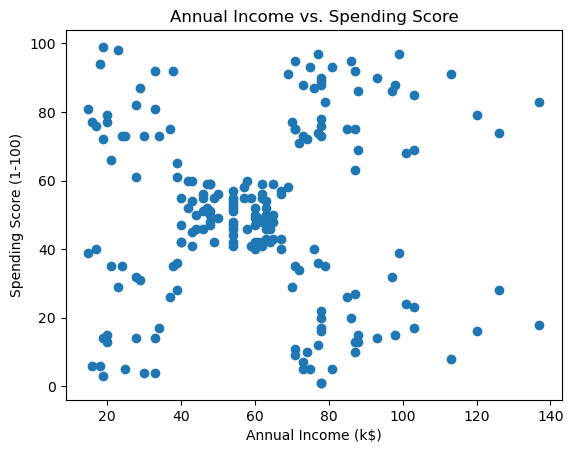

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs. Spending Score')
plt.show()



c. Perform K Means Clustering on the dataset with k=4. What are the cluster centers?

In [5]:
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Get cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[48.16831683 43.3960396 ]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [87.         18.63157895]]


d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


d. Plot a scatter plot of the annual income vs. the spending score, colored by the cluster
assignments. Which clusters are the most distinct and why?

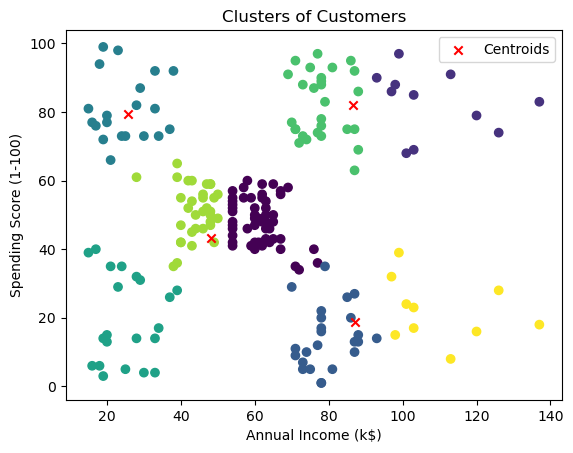

In [15]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

e. What is the within-cluster sum of squares (WCSS) for the K Means Clustering with k=4?


In [9]:
# Calculate WCSS
wcss = kmeans.inertia_
print("WCSS for k=4:", wcss)

WCSS for k=4: 109.22822707921344


Try different values of k (2-8) and plot the corresponding WCSS. At what value of k does
the WCSS start to level off?


d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to 

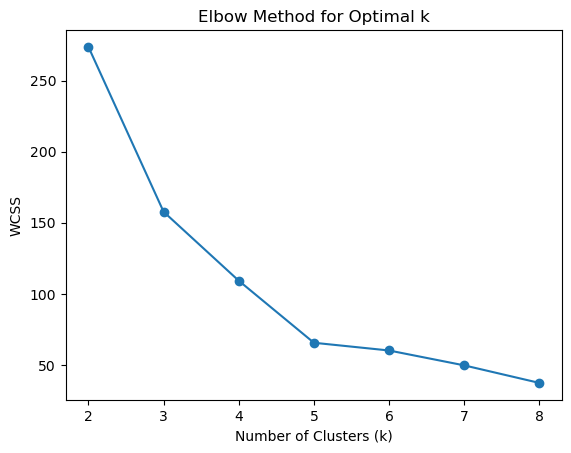

In [10]:
wcss_values = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


g. Perform K Means Clustering on the dataset with the k value you get for question (f).
What are the cluster centers? Visualize it using a scatter plot.


Optimal Cluster Centers:
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


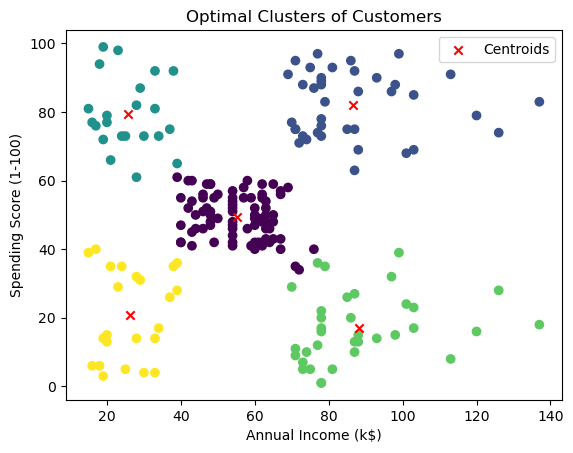

In [13]:
optimal_k = 5  # Replace with the observed optimal value from the elbow method
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_scaled)

# Get cluster centers
optimal_cluster_centers = scaler.inverse_transform(kmeans_optimal.cluster_centers_)
print("Optimal Cluster Centers:\n", optimal_cluster_centers)

# Visualize clusters
data['Optimal Cluster'] = kmeans_optimal.labels_
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Optimal Cluster'], cmap='viridis')
plt.scatter(optimal_cluster_centers[:, 0], optimal_cluster_centers[:, 1], c='red', marker='x', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Optimal Clusters of Customers')
plt.legend()
plt.show()


h. Calculate the silhouette score for the K Means Clustering with the k value for question
(f). What does the silhouette score indicate about the quality of the clustering?

In [14]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, kmeans_optimal.labels_)
print("Silhouette Score for k={}: {:.2f}".format(optimal_k, silhouette_avg))


Silhouette Score for k=5: 0.55


Activity 02

a. Load the in-built wine dataset and Print the names of the attributes (features) in the
loaded wine dataset.

In [1]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# Print attribute names
print("Attribute Names:", wine.feature_names)

Attribute Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


b. Apply the standardization to the wine dataset and print the first few rows of
standardized_data.

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Extract features
X = wine.data

# Apply standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert to a DataFrame for readability
standardized_data = pd.DataFrame(X_standardized, columns=wine.feature_names)

# Print the first few rows
print("Standardized Data (First Few Rows):\n", standardized_data.head())


Standardized Data (First Few Rows):
     alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.

c. Use the linkage function from scipy to perform hierarchical clustering on the
standardized_data using the 'ward' method and Plot the dendrogram using
matplotlib.pyplot to visualize the hierarchical clustering.

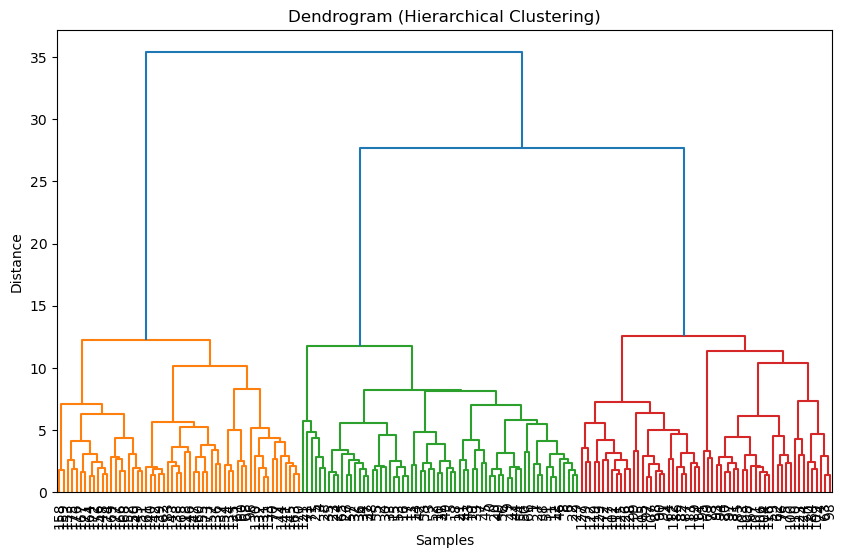

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = linkage(X_standardized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


d. Calculate the silhouette scores for different numbers of clusters (ranging from 2 to 10) in
the hierarchical clustering and determine the optimal number of clusters with the
highest silhouette score and print the result.

In [4]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Function to calculate silhouette score for different cluster counts
silhouette_scores = {}
for n_clusters in range(2, 11):
    # Obtain cluster labels using fcluster
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    # Calculate silhouette score
    silhouette_scores[n_clusters] = silhouette_score(X_standardized, cluster_labels)

# Find the optimal number of clusters
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print("Optimal Number of Clusters (Highest Silhouette Score):", optimal_clusters)


Optimal Number of Clusters (Highest Silhouette Score): 3


e. Perform cutting on the dendrogram using the fcluster function from scipy to obtain the
cluster assignments. Print the cluster assignments for each data point.

In [5]:
# Obtain cluster assignments using the optimal number of clusters
cluster_assignments = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Print cluster assignments
print("Cluster Assignments for Each Data Point:\n", cluster_assignments)


Cluster Assignments for Each Data Point:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 2 2 3 1 3 1 2 3 2
 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


f. Apply K-Means clustering with the optimal number of clusters to the standardized_data
using sklearn.cluster.KMeans and print the K-Means cluster assignments for each data
point.


In [6]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_standardized)

# Print K-Means cluster assignments
print("K-Means Cluster Assignments for Each Data Point:\n", kmeans.labels_)


K-Means Cluster Assignments for Each Data Point:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


d:\Apps\Anaconda\envs\ML_DAY3-4\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


g. Create a scatter plot to visualize the data points and their cluster assignments from
hierarchical clustering. Color the data points based on their cluster assignments and
label the plot accordingly.


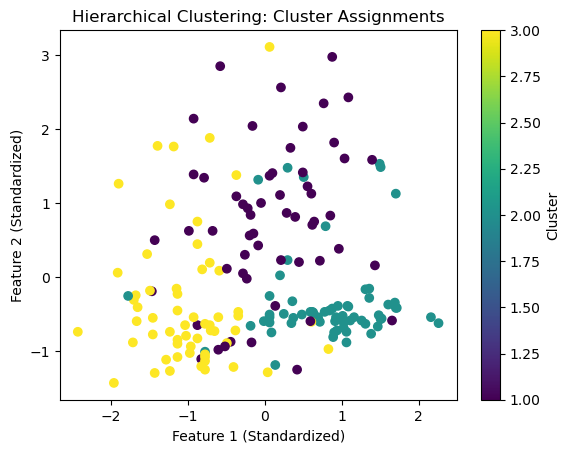

In [7]:
# Scatter plot: Using first two features for visualization
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=cluster_assignments, cmap='viridis')
plt.title("Hierarchical Clustering: Cluster Assignments")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.colorbar(label="Cluster")
plt.show()


h. Create a dendrogram with a red dashed line indicating the height corresponding to the
maximum number of clusters.

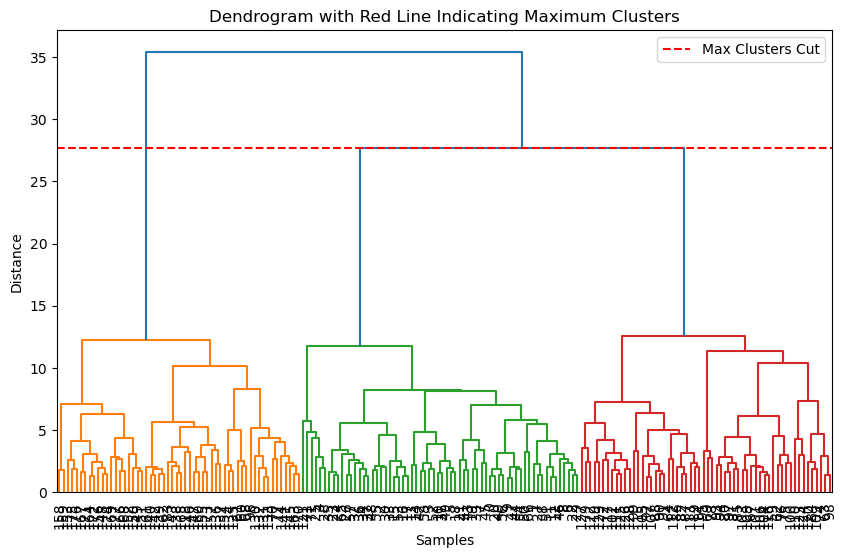

In [8]:
# Plot dendrogram with a horizontal red dashed line at the maximum number of clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
plt.axhline(y=linkage_matrix[-optimal_clusters + 1, 2], color='r', linestyle='--', label="Max Clusters Cut")
plt.title("Dendrogram with Red Line Indicating Maximum Clusters")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.legend()
plt.show()
